# Identification and Classification of Viral Pneumonia by Image-Based Deep Learning
Hamza Khokhar
Final Project
Professor Biwas

## Section 1: Preparing the data

In [119]:
# imports 
import os
import numpy as np
from tqdm import tqdm
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator
import glob
import cv2
import matplotlib.pyplot as plt
from keras.applications.densenet import DenseNet121
from tensorflow.keras.layers import Conv2D, MaxPool2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.utils import to_categorical
from keras import models
from keras.preprocessing import image


import tensorflow as tf
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, BatchNormalization, Activation, GlobalAveragePooling2D
from keras.constraints import maxnorm
from keras.layers.convolutional import Conv2D, MaxPooling2D
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [68]:
# getting all the paths from corresponding images
paths_train_PNEUMONIA = glob.glob("chest_xray/train/PNEUMONIA/*.jpeg")
paths_train_NORMAL = glob.glob("chest_xray/train/NORMAL/*.jpeg")
paths_test_PNEUMONIA = glob.glob("chest_xray/test/PNEUMONIA/*.jpeg")
paths_test_NORMAL = glob.glob("chest_xray/test/NORMAL/*.jpeg")


# Total images for each folder
print('Train PNEUMONIA: '+str(len(paths_train_PNEUMONIA)))
print('Train NORMAL: '+str(len(paths_train_NORMAL)))
print('Test PNEUMONIA: '+str(len(paths_test_PNEUMONIA)))
print('Test PNEUMONIA: '+str(len(paths_test_NORMAL)))


# Total images for each Directory
print('Total Number of Train samples: '+ str(len(paths_train_PNEUMONIA)+len(paths_train_NORMAL)))
print('Total Number of Test samples: '+ str(len(paths_test_PNEUMONIA)+len(paths_test_NORMAL)))


Train PNEUMONIA: 3875
Train NORMAL: 1341
Test PNEUMONIA: 398
Test PNEUMONIA: 242
Val PNEUMONIA: 0
Val Normal: 0
Total Number of Train samples: 5216
Total Number of Test samples: 640
Total Number of Validation samples: 0


In [255]:
paths_test_PNEUMONIA[0]

'chest_xray/test/PNEUMONIA/person147_bacteria_706.jpeg'

In [248]:
train_images = []
train_labels = []
test_images = []
test_labels = []


for path in tqdm(paths_train_PNEUMONIA): 
    image= cv2.imread(path)
    image=cv2.resize(image, (200, 200))
    image=np.array(image)
    image = image.astype('float32')
    image /= 255 
    train_images.append(image)
    train_labels.append(1)

for path in tqdm(paths_train_NORMAL): 
    image= cv2.imread(path)
    image=cv2.resize(image, (200, 200))
    image=np.array(image)
    image = image.astype('float32')
    image /= 255 
    train_images.append(image)
    train_labels.append(0)
    
for path in tqdm(paths_test_PNEUMONIA): 
    image= cv2.imread(path)
    image=cv2.resize(image, (200, 200))
    image=np.array(image)
    image = image.astype('float32')
    image /= 255 
    test_images.append(image)
    test_labels.append(1)
    
for path in tqdm(paths_test_NORMAL): 
    image= cv2.imread(path)
    image=cv2.resize(image, (200, 200))
    image=np.array(image)
    image = image.astype('float32')
    image /= 255 
    test_images.append(image)
    test_labels.append(0)
    


100%|██████████| 242/242 [00:04<00:00, 53.44it/s]


In [253]:
train_images=np.array(train_images, np.float32)
train_labels=np.array(train_labels)
test_images=np.array(test_images, np.float32)
test_labels=np.array(test_labels)

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)




In [250]:
print(train_images.shape) 
print(train_labels.shape) 
print(test_images.shape) 
print(test_labels.shape) 

(5216, 200, 200, 3)
(5216, 2)
(640, 200, 200, 3)
(640,)


In [74]:
datagen = ImageDataGenerator(
        featurewise_center = False,
        samplewise_center = False,
        featurewise_std_normalization = False, 
        samplewise_std_normalization = False,
        zca_whitening = False,
        horizontal_flip = False,
        vertical_flip = False,
        rotation_range = 10,  
        zoom_range = 0.1, 
        width_shift_range = 0.1, 
        height_shift_range = 0.1)

datagen.fit(train_images)
train_gen = datagen.flow(train_images, train_labels, batch_size = 32,shuffle=True)

In [ ]:
callbacks = [ 
    EarlyStopping(monitor = 'loss', patience = 7), 
    ReduceLROnPlateau(monitor = 'loss', patience = 7), 
    ModelCheckpoint('../working/model.best4.hdf5', monitor='loss' , save_best_only=True) # saving the best model
]

In [75]:
def model1():
    return Sequential([
        Conv2D(16, kernel_size=(3, 3), activation='relu', padding='same', input_shape = (200,200,3)),
        Conv2D(16, kernel_size=(3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPool2D(pool_size=(2, 2)),
        Dropout(0.2),
        
        Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'),
        Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPool2D(pool_size=(2, 2)),
        Dropout(0.2),
        
        Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
        Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPool2D(pool_size=(2, 2)),
        Dropout(0.2),
        
        Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'),
        Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPool2D(pool_size=(2, 2)),
        Dropout(0.2),
        
        Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'),
        Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPool2D(pool_size=(2, 2)),
        Dropout(0.2),
        
        Flatten(),
       
        Dense(1024, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),
        
        
         Dense(512, activation='relu'),
        BatchNormalization(),
        Dropout(0.4),
        
        Dense(256, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),
        
        Dense(64, activation='relu'),
        BatchNormalization(),
        Dropout(0.2),
        
        Dense(2, activation = "softmax")
        
    ])

In [164]:
model2 = model1()
model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_77 (Conv2D)           (None, 225, 225, 16)      448       
_________________________________________________________________
conv2d_78 (Conv2D)           (None, 225, 225, 16)      2320      
_________________________________________________________________
batch_normalization_55 (Batc (None, 225, 225, 16)      64        
_________________________________________________________________
max_pooling2d_45 (MaxPooling (None, 112, 112, 16)      0         
_________________________________________________________________
dropout_57 (Dropout)         (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_79 (Conv2D)           (None, 112, 112, 32)      4640      
_________________________________________________________________
conv2d_80 (Conv2D)           (None, 112, 112, 32)    

In [77]:
learning_history = model.fit_generator((train_gen), 
                               epochs = 80, 
                               steps_per_epoch = train_images.shape[0] // 32,
                               validation_data = (train_images, train_labels),callbacks = callbacks)

Epoch 1/80
163/163 [==============================] - 317s 2s/step - loss: 0.6072 - accuracy: 0.7318 - val_loss: 1.4492 - val_accuracy: 0.7429
Epoch 2/80
163/163 [==============================] - 319s 2s/step - loss: 0.2464 - accuracy: 0.9129 - val_loss: 2.4513 - val_accuracy: 0.7429
Epoch 3/80
163/163 [==============================] - 321s 2s/step - loss: 0.1991 - accuracy: 0.9300 - val_loss: 1.4394 - val_accuracy: 0.7429
Epoch 4/80
163/163 [==============================] - 321s 2s/step - loss: 0.1842 - accuracy: 0.9306 - val_loss: 1.9484 - val_accuracy: 0.7429
Epoch 5/80
163/163 [==============================] - 325s 2s/step - loss: 0.1665 - accuracy: 0.9366 - val_loss: 0.1826 - val_accuracy: 0.9427
Epoch 6/80
163/163 [==============================] - 323s 2s/step - loss: 0.1635 - accuracy: 0.9361 - val_loss: 5.6041 - val_accuracy: 0.3401
Epoch 7/80
163/163 [==============================] - 319s 2s/step - loss: 0.1511 - accuracy: 0.9436 - val_loss: 0.2447 - val_accuracy: 0.9059

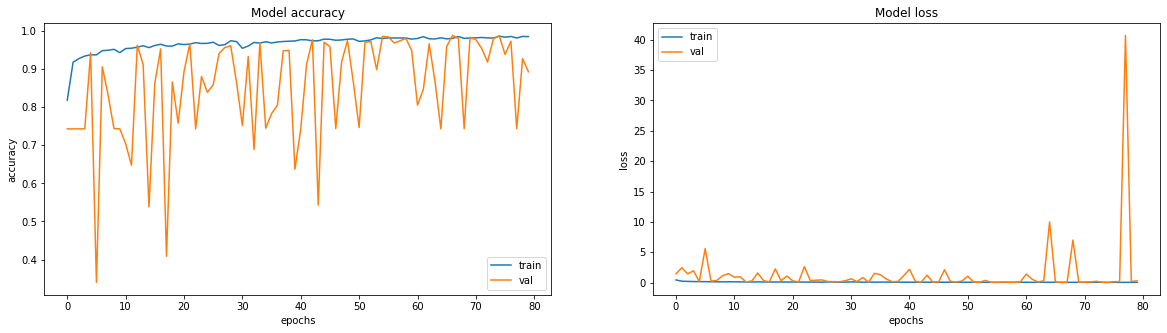

In [241]:
fig, ax = plt.subplots(1, 2, figsize=(20, 5))
ax = ax.ravel()

for i, met in enumerate(['accuracy', 'loss']):
    ax[i].plot(learning_history.history[met])
    ax[i].plot(learning_history.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

In [254]:
y_pred = model2.predict(test_images)


InvalidArgumentError:  Input to reshape is a tensor with 294912 values, but the requested shape requires a multiple of 12544
	 [[node sequential_12/flatten_12/Reshape (defined at <ipython-input-251-d74532f68ad4>:1) ]] [Op:__inference_predict_function_108897]

Function call stack:
predict_function


In [243]:
y_pred = np.argmax(y_pred, axis = 1)

In [246]:
del(test_labels)

In [247]:
test_labels = np.argmax(test_labels, axis = 1)


NameError: name 'test_labels' is not defined

In [237]:
print(classification_report(test_labels, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       242
           1       0.62      1.00      0.77       398

    accuracy                           0.62       640
   macro avg       0.31      0.50      0.38       640
weighted avg       0.39      0.62      0.48       640



In [145]:
model=tf.keras.models.Sequential([
    
    tf.keras.layers.Conv2D(8,(3,3),activation ='relu', input_shape=(200,200,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(16,(3,3),activation ='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(32,(3,3),activation ='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(1024,activation='relu'),
    tf.keras.layers.Dense(512,activation='relu'),
    
    tf.keras.layers.Dense(3,activation='softmax')    
 ])

In [146]:
layer_names = [layer.name for layer in model.layers]
layer_names

['conv2d_74',
 'max_pooling2d_42',
 'conv2d_75',
 'max_pooling2d_43',
 'conv2d_76',
 'max_pooling2d_44',
 'flatten_10',
 'dense_40',
 'dense_41',
 'dense_42']

In [147]:
model.layers

In [165]:
layer_outputs = [layer.output for layer in model2.layers]
layer_outputs

[<KerasTensor: shape=(None, 225, 225, 16) dtype=float32 (created by layer 'conv2d_87')>,
 <KerasTensor: shape=(None, 225, 225, 16) dtype=float32 (created by layer 'conv2d_88')>,
 <KerasTensor: shape=(None, 225, 225, 16) dtype=float32 (created by layer 'batch_normalization_64')>,
 <KerasTensor: shape=(None, 112, 112, 16) dtype=float32 (created by layer 'max_pooling2d_50')>,
 <KerasTensor: shape=(None, 112, 112, 16) dtype=float32 (created by layer 'dropout_66')>,
 <KerasTensor: shape=(None, 112, 112, 32) dtype=float32 (created by layer 'conv2d_89')>,
 <KerasTensor: shape=(None, 112, 112, 32) dtype=float32 (created by layer 'conv2d_90')>,
 <KerasTensor: shape=(None, 112, 112, 32) dtype=float32 (created by layer 'batch_normalization_65')>,
 <KerasTensor: shape=(None, 56, 56, 32) dtype=float32 (created by layer 'max_pooling2d_51')>,
 <KerasTensor: shape=(None, 56, 56, 32) dtype=float32 (created by layer 'dropout_67')>,
 <KerasTensor: shape=(None, 56, 56, 64) dtype=float32 (created by layer 

In [201]:
layer_outputs = [layer.output for layer in model2.layers[:32]]

In [202]:
activation_model = models.Model(inputs=model2.input, outputs=layer_outputs)

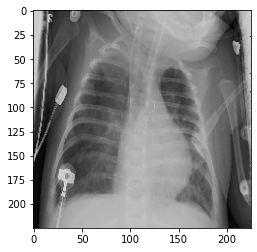

(1, 225, 225, 3)


In [203]:
img_path = paths_train_PNEUMONIA[0]

img = image.load_img(img_path, target_size=(225, 225))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

plt.imshow(img_tensor[0])
plt.show()

print(img_tensor.shape)

In [204]:
activations = activation_model.predict(img_tensor)

In [205]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 225, 225, 16)


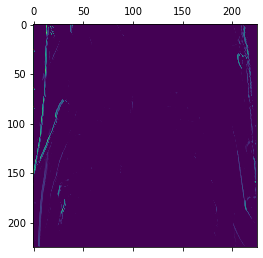

In [206]:
plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')

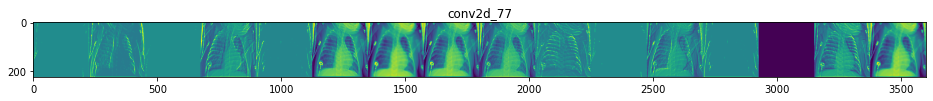

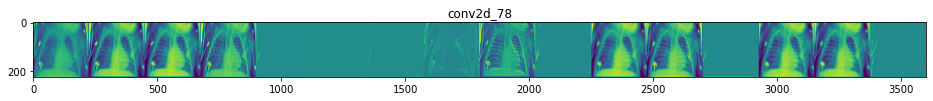

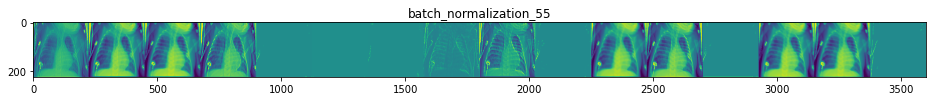

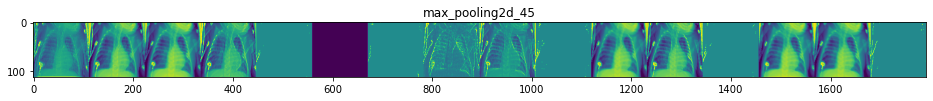

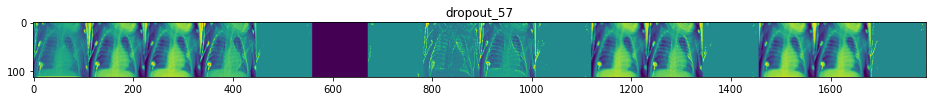

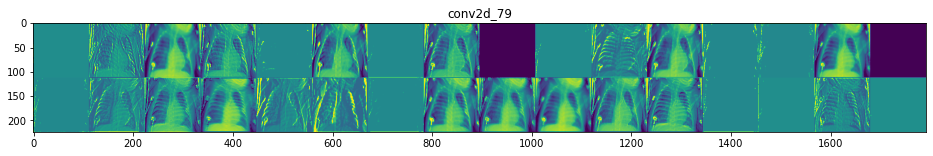

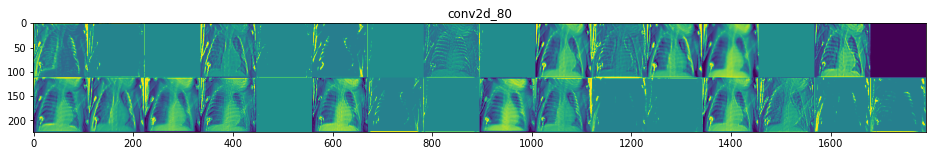

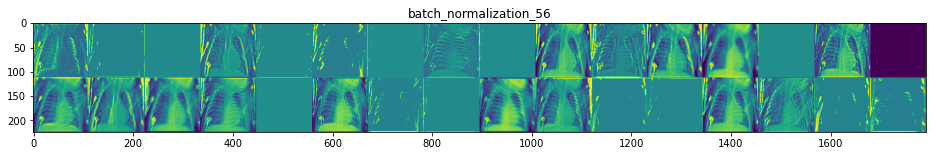

In [207]:
layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name) # Names of the layers, so you can have them as part of your plot
    
images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations): # Displays the feature maps
    n_features = layer_activation.shape[-1] # Number of features in the feature map
    size = layer_activation.shape[1] #The feature map has shape (1, size, size, n_features).
    n_cols = n_features // images_per_row # Tiles the activation channels in this matrix
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    for col in range(n_cols): # Tiles each filter into a big horizontal grid
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            channel_image -= channel_image.mean() # Post-processes the feature to make it visually palatable
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, # Displays the grid
                         row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

In [215]:
import lime
from lime import lime_image
from skimage.segmentation import mark_boundaries

1


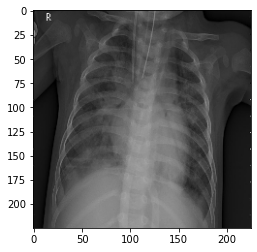

In [217]:
idx = 200
print(test_labels[idx])
plt.imshow(test_images[idx])


In [256]:

img = cv2.imread(paths_train_PNEUMONIA[3])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (200, 200))

(200, 200, 3)

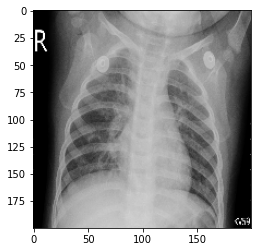

In [257]:
plt.imshow(img)
img.shape

In [258]:
explainer = lime_image.LimeImageExplainer()

In [261]:
explanation = explainer.explain_instance(img, model2.predict_classes, top_labels=2, hide_color=0, num_samples=1000)
source_image, mask = explanation.get_image_and_mask(0, positive_only=False)

ValueError: in user code:

    /Users/hamza/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1478 predict_function  *
        return step_function(self, iterator)
    /Users/hamza/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1468 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /Users/hamza/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /Users/hamza/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /Users/hamza/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    /Users/hamza/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1461 run_step  **
        outputs = model.predict_step(data)
    /Users/hamza/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1434 predict_step
        return self(x, training=False)
    /Users/hamza/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer.py:1012 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    /Users/hamza/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:375 call
        return super(Sequential, self).call(inputs, training=training, mask=mask)
    /Users/hamza/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/functional.py:424 call
        return self._run_internal_graph(
    /Users/hamza/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/functional.py:560 _run_internal_graph
        outputs = node.layer(*args, **kwargs)
    /Users/hamza/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /Users/hamza/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/input_spec.py:255 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer dense_48 is incompatible with the layer: expected axis -1 of input shape to have value 12544 but received input with shape (None, 9216)
